## Modeling for Overall Quality

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [50]:
df =pd.read_csv('../../data/logistic_regression_model_data/processed_data/feature_data.csv')

In [51]:
df.head()

,lot_shape,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,fence,overall_qual,street_Pave,alley_Not Applicable,alley_Pave,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,house_style_1.5Unf,...,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_Not Applicable,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_Not Applicable,misc_feature_Gar2,misc_feature_Not Applicable,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC
0,2,3,3,3,1,6,4,5,3,7,0,2,3,3,2,0,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,2,3,4,3,1,6,4,5,3,7,3,2,3,3,2,0,7,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,3,2,3,3,1,6,2,5,3,7,0,1,3,3,2,0,5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,3,2,4,3,1,1,3,5,2,7,0,3,3,3,2,0,5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,2,2,2,4,1,1,2,5,2,7,0,1,3,3,0,0,6,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [52]:
X = df.drop(columns=['overall_qual'])
y = df['overall_qual']

In [53]:
print(y.value_counts(normalize=True))

overall_qual
5     0.274634
6     0.246829
7     0.210244
8     0.121463
4     0.077561
9     0.037561
3     0.014146
10    0.011220
2     0.004390
1     0.001951
Name: proportion, dtype: float64


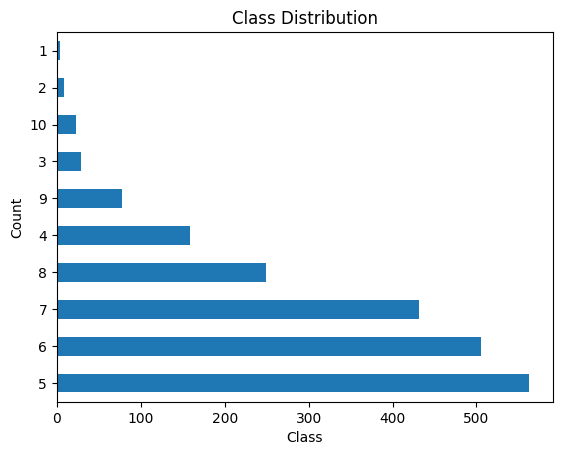

In [54]:
y.value_counts().plot(kind='barh')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

In [56]:
model = LogisticRegression (max_iter=10000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6174216027874564

I got a low accuracy score due to the number of classes I have. I will categorize my target classes into three: Low, Medium, High.

In [57]:
def categorize_quality(score):
    if score <= 4:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

# Apply it to the dataset
df['overall_qual_category'] = df['overall_qual'].apply(categorize_quality)

In [58]:
X = df.drop(columns=['overall_qual', 'overall_qual_category'])
y = df['overall_qual_category']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8567073170731707

In [61]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.80      0.70      0.75        70
         Low       0.59      0.33      0.42        40
      Medium       0.85      0.93      0.89       300

    accuracy                           0.83       410
   macro avg       0.75      0.65      0.69       410
weighted avg       0.82      0.83      0.82       410



High-class has high precision. Meaning our model is strong at predicting overall quality as 'High'

## Interpreting Coeffficients

In [65]:
# Get raw coefficients from trained logistic regression model
coef_log_odds = pd.DataFrame(
    model.coef_,
    columns=X.columns,
    index=model.classes_  # ['High', 'Low', 'Medium']
).T  # Transpose to have features as rows

# Convert log-odds to odds ratios
coef_odds = np.exp(coef_log_odds)

# Round for readability
coef_odds_rounded = coef_odds.round(4)

In [76]:
coef_odds_rounded['High'].sort_values(ascending=False).head(10)

exter_qual              6.4362
kitchen_qual            2.6725
bsmt_qual               2.5764
exterior_2nd_Stucco     2.5427
exterior_1st_BrkFace    2.4530
paved_drive             2.0966
house_style_2Story      2.0685
heating_OthW            2.0602
roof_matl_WdShngl       1.8634
lot_config_FR3          1.8152
Name: High, dtype: float64

## Data-Driven Recommendations to Increase the Odds of High Overall Quality (7+)

| Feature               | Odds Ratio | Recommendation                                                                 |
|-----------------------|------------|---------------------------------------------------------------------------------|
| `exter_qual`          | 6.44       | Invest in high-quality exterior finishes (e.g., brick, stone, stucco).         |
| `kitchen_qual`        | 2.67       | Upgrade kitchen cabinetry, appliances, and layout.                             |
| `bsmt_qual`           | 2.58       | Improve basement livability — add finishing, lighting, or moisture control.    |
| `exterior_2nd_Stucco` | 2.54       | Use stucco as a secondary exterior material for added curb appeal.             |
| `exterior_1st_BrkFace`| 2.45       | Apply brick facade on the main exterior to improve prestige.                   |
| `paved_drive`         | 2.10       | Ensure the property has a well-maintained, paved driveway.                     |
| `house_style_2Story`  | 2.07       | Favor two-story designs, often associated with larger or modern homes.         |
| `heating_OthW`        | 2.06       | Consider modern, alternative heating solutions where appropriate.              |
| `roof_matl_WdShngl`   | 1.86       | Use wood shingles for a premium roof appearance.                               |
| `functional`          | 1.47       | Ensure the home layout and functionality align with modern living needs.       |